In [263]:
# plot by latitude and longitude 
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [264]:
import numpy as np 
import xarray as xr
import pandas as pd 
import datetime 
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [265]:
# load in data
awas_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/awas_data_df_twp_noRF06.pkl")
toga_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/toga_data_df_twp_noRF06.pkl")

for col in awas_df.columns: 
    print(col) 

Time_UTC
Flight
Notes
Intrument
GGALT
GGLAT
GGLON
C2H6_Ethane
C2H2_Ethyne
C3H8_Propane
C4H10_Isobutane
C4H10_nButane
C5H12_nPentane
C6H6_Benzene
OCS_Carbonyl_sulfide
C2H6S_Dimethyl_sulfide
CCl2F2_CFC_12
CCl3F_CFC_11
CCl2FCCl2F_CFC112
CCl3CClF2_CFC_112a
C2Cl3F3_CFC_113
C2Cl2F4_CFC_114
CHClF2_HCFC_22
CH3CClF2_HCFC_142b
CH3CCl2F_HCFC_141b
CH2FCF3_HFC_134a
C4H5F5_HFC365mfc
CH3Cl_Methyl_chloride
CH3Br_Methyl_bromide
CH2Cl2_Methylene_chloride
CHCl3_Chloroform
CH3CCl3_Methyl_chloroform
CCl4_Carbon_tetrachloride
C2H4Cl2_1_2_Dichloroethane
C2Cl4_Tetrachloroethylene
C6H5Cl_Chlorobenzene
CBrClF2_Halon_1211
C2Br2F4_Halon_2402
CH2BrCl_Bromochloromethane
CH2Br2_Methylene_bromide
CHBrCl2_Bromodichloromethane
CHBr2Cl_Dibromochloromethane
CHBr3_Bromoform
C2H5ONO2_Ethyl_nitrate
C3H7NO3_Isopropyl_nitrate
C4H9NO3_2_Butyl_nitrate
C4H9NO3_n_Butyl_nitrate


count     54.000000
mean     148.533188
std        4.171148
min      138.849365
25%      146.874561
50%      148.963799
75%      150.955894
max      154.659134
Name: GGLON, dtype: float64

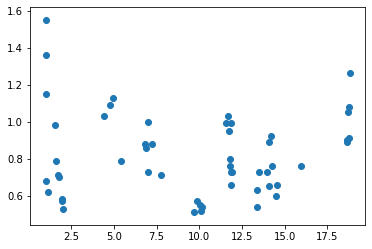

In [266]:
awas_trc = awas_df[['Flight', 'Intrument', 'GGALT', 'GGLAT', 'GGLON', 'C6H6_Benzene', \
                    'C3H8_Propane', 'CHBr3_Bromoform', 'C4H10_nButane', 'C4H10_Isobutane', \
                    'C5H12_nPentane', 'C2H2_Ethyne', 'C2H6_Ethane']]
awas_trc_bl = awas_trc[awas_trc['GGALT'] < 2000]
plt.scatter(awas_trc_bl['GGLAT'], awas_trc_bl['CHBr3_Bromoform'])
awas_trc_bl['GGLON'].describe()

In [267]:
#####################################################################################
#####################################################################################
# group by every 2.5 degrees lat 
latlabels = ['0-2.5', '2.5-5.0', '5.0-7.5', '7.5-10.0', \
          '10.0-12.5', '12.5-15.0', '15.0-17.5', '17.5-20.0']
#ticklabels = ['0-2.5', '2.5-5.0', '5.0-7.5', '7.5-10.0', \
#          '10.0-12.5', '12.5-15.0', '15.0-17.5', '17.5-20.0']
latbinedges = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20]
awas_trc_bl['lat_bins'] = pd.cut(awas_trc_bl['GGLAT'], latbinedges, labels = latlabels)

# group by every 2.5 degrees lon
lonlabels = ['137.5-140.0', '140.0-142.5', '142.5-145.0', \
          '145.0-147.5', '147.5-150.0', '150.0-152.5', '152.5-155.0']
#ticklabels = ['0-2.5', '2.5-5.0', '5.0-7.5', '7.5-10.0', \
#          '10.0-12.5', '12.5-15.0', '15.0-17.5', '17.5-20.0']
lonbinedges = [137.5, 140, 142.5, 145, 147.5, 150, 152.5, 155]
awas_trc_bl['lon_bins'] = pd.cut(awas_trc_bl['GGLON'], lonbinedges, labels = lonlabels)

/Users/schelpon/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/schelpon/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


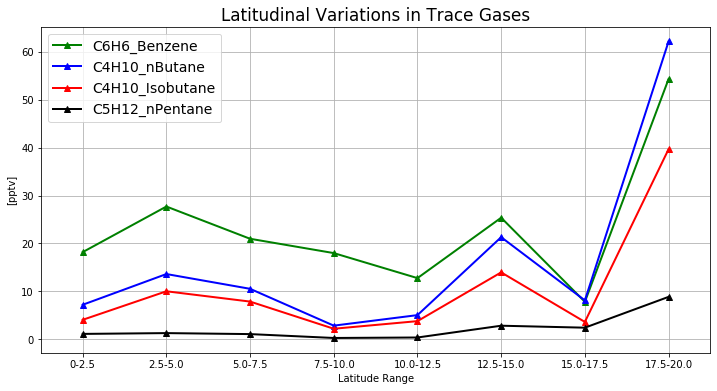

In [268]:
# grouby lat 
gblat = awas_trc_bl.groupby('lat_bins').mean()
gblat['ind'] = np.arange(1, len(gblat)+1)
gblat

# plot 
fig, ax = plt.subplots(figsize = [12, 6])
plt.rcParams.update({'font.size': 14})

plt.plot(gblat['ind'], gblat['C6H6_Benzene'],marker='^',color = 'g',linewidth=2,linestyle='-',label = 'C6H6_Benzene')
plt.plot(gblat['ind'], gblat['C4H10_nButane'],marker='^',color = 'b',linewidth=2,linestyle='-',label = 'C4H10_nButane')
plt.plot(gblat['ind'], gblat['C4H10_Isobutane'],marker='^',color = 'r',linewidth=2,linestyle='-',label = 'C4H10_Isobutane')
plt.plot(gblat['ind'], gblat['C5H12_nPentane'],marker='^',color = 'k',linewidth=2,linestyle='-',label = 'C5H12_nPentane')

ax.set_xticks(np.arange(1,9))
ax.set_xticklabels(latlabels)
ax.set_xlabel('Latitude Range')
ax.set_ylabel('[pptv]')
ax.set_title('Latitudinal Variations in Trace Gases')
ax.set_xlim([0.5, 8.5])

plt.grid(which = 'major')
plt.legend()

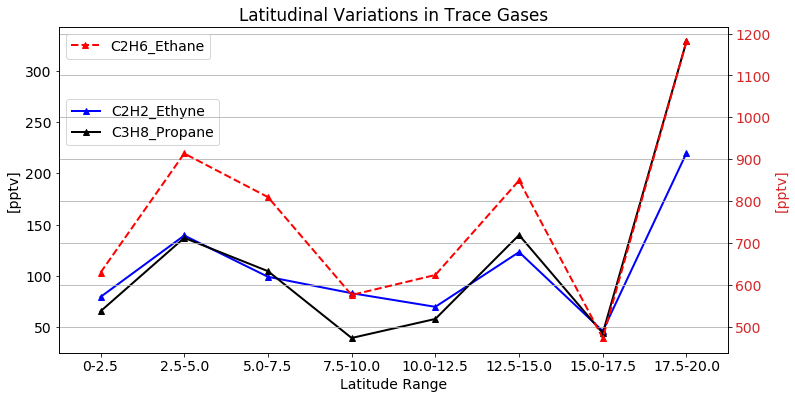

In [269]:
fig, ax1 = plt.subplots(figsize = [12, 6])
plt.rcParams.update({'font.size': 14})

ax1.plot(gblat['ind'], gblat['C2H2_Ethyne'],marker='^',color = 'b',linewidth=2,linestyle='-',label = 'C2H2_Ethyne')
ax1.plot(gblat['ind'], gblat['C3H8_Propane'],marker='^',color = 'k',linewidth=2,linestyle='-',label = 'C3H8_Propane')

ax1.set_xticks(np.arange(1,9))
ax1.set_xticklabels(latlabels)
ax1.set_xlabel('Latitude Range')
ax1.set_ylabel('[pptv]')
ax1.set_title('Latitudinal Variations in Trace Gases')
ax1.set_xlim([0.5, 8.5])
ax1.legend(loc='upper right', bbox_to_anchor=(0.25, 0.8))

# add second axes
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('[pptv]', color=color)  # we already handled the x-label with ax1
ax2.plot(gblat['ind'], gblat['C2H6_Ethane'],marker='^',color = 'r',linewidth=2,linestyle='--',label = 'C2H6_Ethane')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right', bbox_to_anchor=(0.25, 0.8))

plt.grid(which = 'major')
plt.legend()

In [270]:
#####################################################################################
#####################################################################################
gblon = awas_trc_bl.groupby('lon_bins').mean()
gblon['ind'] = np.arange(1, len(gblon)+1)
gblon

,GGALT,GGLAT,GGLON,C6H6_Benzene,C3H8_Propane,CHBr3_Bromoform,C4H10_nButane,C4H10_Isobutane,C5H12_nPentane,C2H2_Ethyne,C2H6_Ethane,ind
lon_bins,,,,,,,,,,,,
137.5-140.0,704.273865,9.946402,139.289719,19.299999,39.666668,0.538000,3.166667,2.333333,0.200000,86.833336,587.333313,1
140.0-142.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
142.5-145.0,1450.758423,12.632379,144.580811,15.200000,48.750000,0.660000,4.975000,2.825000,1.000000,80.000000,628.500000,3
145.0-147.5,1327.786011,10.113869,146.840103,11.583333,64.333336,0.973333,7.300000,5.366667,1.075000,68.166664,580.500000,4
147.5-150.0,639.224548,12.215934,148.763870,30.493750,171.062500,0.865000,27.643751,18.081249,3.900000,129.562500,893.500000,5
150.0-152.5,783.011536,2.867851,150.896011,19.858334,82.583336,0.845000,9.175000,5.483333,1.222222,90.166664,690.083313,6
152.5-155.0,439.083771,11.338211,153.471497,27.025000,154.100006,0.846000,22.070000,14.800000,2.590000,134.625000,892.000000,7


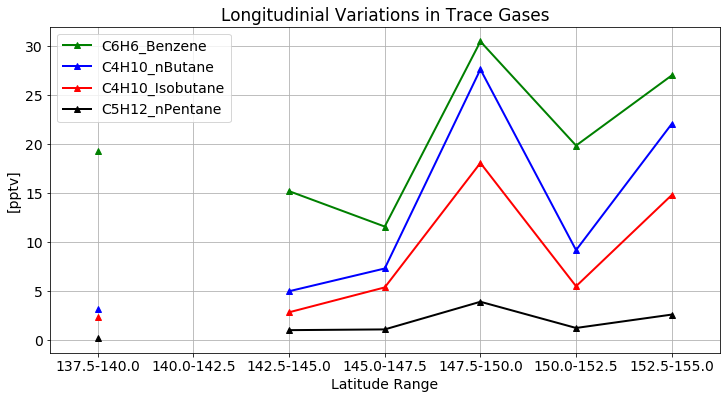

In [271]:
# plot 
fig, ax = plt.subplots(figsize = [12, 6])
plt.rcParams.update({'font.size': 14})

plt.plot(gblon['ind'], gblon['C6H6_Benzene'],marker='^',color = 'g',linewidth=2,linestyle='-',label = 'C6H6_Benzene')
plt.plot(gblon['ind'], gblon['C4H10_nButane'],marker='^',color = 'b',linewidth=2,linestyle='-',label = 'C4H10_nButane')
plt.plot(gblon['ind'], gblon['C4H10_Isobutane'],marker='^',color = 'r',linewidth=2,linestyle='-',label = 'C4H10_Isobutane')
plt.plot(gblon['ind'], gblon['C5H12_nPentane'],marker='^',color = 'k',linewidth=2,linestyle='-',label = 'C5H12_nPentane')

ax.set_xticks(np.arange(1,8))
ax.set_xticklabels(lonlabels)
ax.set_xlabel('Latitude Range')
ax.set_ylabel('[pptv]')
ax.set_title('Longitudinial Variations in Trace Gases')
ax.set_xlim([0.5, 7.5])

plt.grid(which = 'major')
plt.legend()

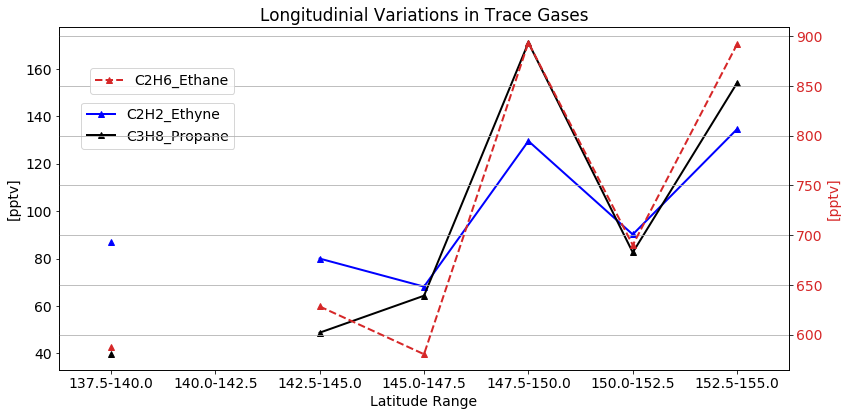

In [272]:
# plot 
fig, ax1 = plt.subplots(figsize = [12, 6])
plt.rcParams.update({'font.size': 14})

ax1.plot(gblon['ind'], gblon['C2H2_Ethyne'],marker='^',color = 'b',linewidth=2,linestyle='-',label = 'C2H2_Ethyne')
ax1.plot(gblon['ind'], gblon['C3H8_Propane'],marker='^',color = 'k',linewidth=2,linestyle='-',label = 'C3H8_Propane')

ax1.set_xticks(np.arange(1,8))
ax1.set_xticklabels(lonlabels)
ax1.set_xlabel('Latitude Range')
ax1.set_ylabel('[pptv]')
ax1.set_title('Longitudinial Variations in Trace Gases')
ax1.set_xlim([0.5, 7.5])
ax1.legend(loc='upper right', bbox_to_anchor=(0.25, 0.8))

# add second axes
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('[pptv]', color=color)  # we already handled the x-label with ax1
ax2.plot(gblon['ind'], gblon['C2H6_Ethane'],marker='^',color =color,linewidth=2,linestyle='--',label = 'C2H6_Ethane')
ax2.tick_params(axis='y', labelcolor=color)

plt.grid(which = 'major')
ax2.legend(loc='upper right', bbox_to_anchor=(0.25, 0.9))
fig.tight_layout()